Part 2: Homography

Let the user choose 4 points 
import opencv-python version: 4.8.0
import numpy.linalg

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as  linalg

Q1 GUI for coordinates select

In [2]:
image_1 = cv2.imread('h1.jpg')
image_2 = cv2.imread('h2.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
image_s = cv2.imread('simpsons.jpg')
image_s = cv2.cvtColor(image_s, cv2.COLOR_BGR2RGB)
image_b = cv2.imread('bus.jpg')
image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB)

print(image_1.shape, image_2.shape)

points_1=[]
points_2=[]
points_b=[]

def coordinates_select(event, x, y, flags, param):
    """
    GUI function it will first show h1.jpg to choose 4 coordinates,
    then show h2.jpg and choose 4 corresponding coordinates pairs with h1.jpg
    each will be saved in points_1 and points_2 respectively 

    """
    global click_on_image
    if event == cv2.EVENT_LBUTTONDOWN:
        if click_on_image==1:
           points_1.append((x, y))
           cv2.circle(image_1, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on h1.jpg', image_1)
        elif click_on_image==2:
           points_2.append((x, y))
           cv2.circle(image_2, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on h2.jpg corresponding to points in h1.jpg', image_2)
        elif click_on_image==3:
           points_b.append((x, y))
           cv2.circle(image_b, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on bus.jpg', image_b)

click_on_image=1
cv2.imshow('Find four points on h1.jpg', image_1)
cv2.setMouseCallback('Find four points on h1.jpg', coordinates_select)
while len(points_1) < 4:
    cv2.waitKey(10)
cv2.destroyWindow('Find four points on h1.jpg')

click_on_image=2
cv2.imshow('Find four points on h2.jpg corresponding to points in h1.jpg', image_2)
cv2.setMouseCallback('Find four points on h2.jpg corresponding to points in h1.jpg', coordinates_select)
while len(points_2) < 4:
    cv2.waitKey(10)
cv2.destroyWindow('Find four points on h2.jpg corresponding to points in h1.jpg')


def cv2_coordinates(points_1, points_2):
    img_p1=[]
    img_p2=[]
    for (x,y),(u,v) in zip(points_1, points_2):
        img_p1.append((y,x))
        img_p2.append((v,u))
    return img_p1, img_p2
cv_points_1, cv_points_2= cv2_coordinates(points_1, points_2)
print("saved points",cv_points_1, cv_points_2)

(1200, 1200, 3) (587, 850, 3)
saved points [(4, 7), (844, 7), (846, 958), (9, 958)] [(210, 8), (560, 369), (292, 844), (10, 471)]


Q2. transform from h_1.jpg to h_2.jpg and homography matrix

[[ 3.34835810e-01 -2.10864121e-01  2.10200941e+02]
 [ 3.75888691e-01  5.44637871e-01  2.68642720e+00]
 [-1.46354122e-04  1.27328478e-04  1.00000000e+00]]


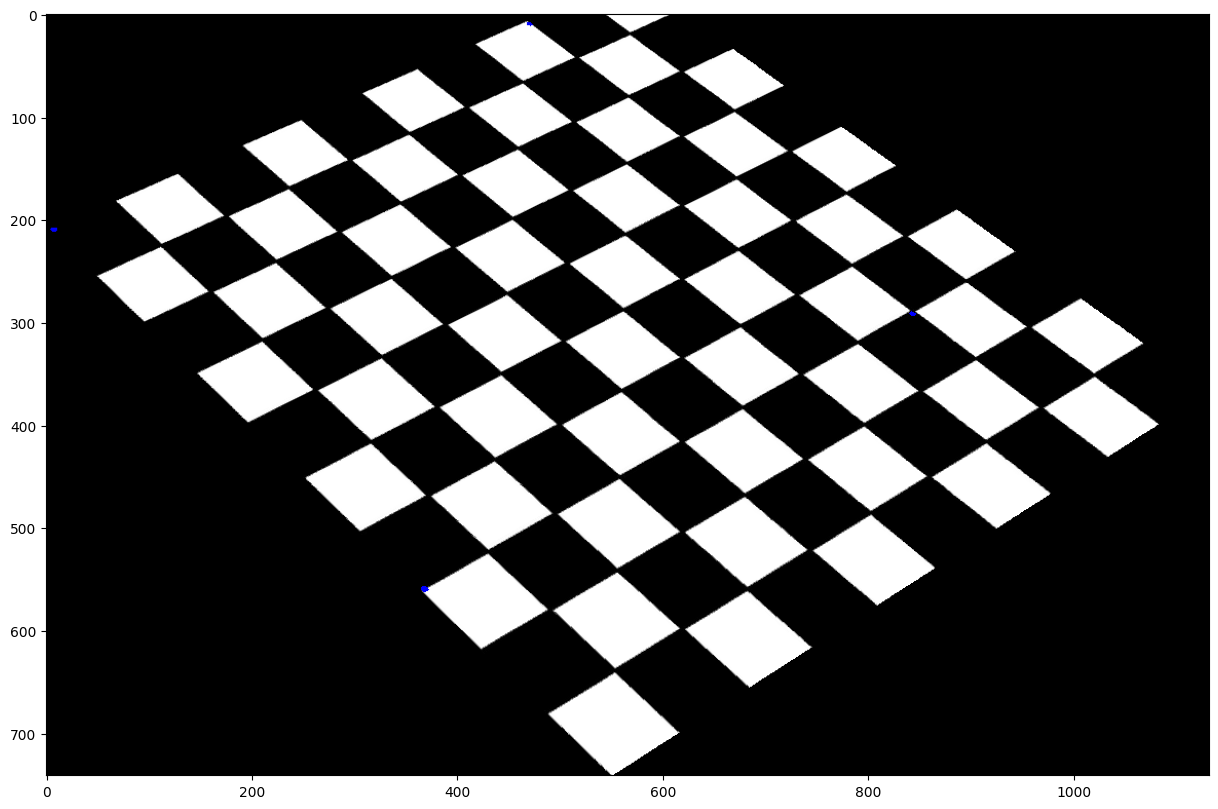

In [4]:
"""
Compute the homography matrix from h1.jpg to h2.jpg
"""
def compute_H(points_1, points_2, show_H):
    d=len(points_1)
    A = np.zeros([2*d, 9])
    for index ,(point_1, point_2) in enumerate(zip (points_1, points_2)):
        (x_1, y_1),(x_2,y_2)= point_1, point_2
        A[2*index, :]=[x_1, y_1,1,0,0,0,-x_2*x_1, -x_2*y_1, -x_2]
        A[2*index+1, :]=[0,0,0,x_1,y_1,1,-y_2*x_1, -y_2*y_1, -y_2]
    U, D, V= linalg.svd(A)
    H= V [-1, :].reshape(3,3)
    H = H / H[2, 2]
    if show_H is True:
        print(H)
    return H

def transform_h_2_h(h_1, h_2,cv_p1,cv_p2,show_H):
    x,y,z= h_1.shape
    u,v,w= h_2.shape
    if x>u or y>v :
        m_list=[0]
        n_list=[0]
        Matrix_H= compute_H(cv_p1, cv_p2, show_H)
        corners= [(0,0),(x-1,0),(x-1,y-1),(0,y-1)]
        for corner in corners:
            m,n= corner
            temp= np.dot(Matrix_H, np.array([m, n, 1]))
            temp_m, temp_n,_ =temp/temp[2]
            m_list.append(int(temp_m))
            n_list.append(int(temp_n))
        u,v=int(max(m_list)), int(max(n_list))
        image= np.zeros([u,v,3],dtype=np.uint8)
        for row in range(x):
           for col in range (y):
               temp= np.dot(Matrix_H, np.array([row, col, 1]))
               temp_x, temp_y,_= temp/temp[2]
               if 0<=temp_x<u and 0<=temp_y<v:
                   image[int(temp_x),int(temp_y),:]= h_1[row, col,:]
        return image
    else: 
        m_list=[0]
        n_list=[0]
        Matrix_H= compute_H(cv_p1, cv_p2, show_H)
        corners= [(0,0),(x-1,0),(x-1,y-1),(0,y-1)]
        for corner in corners:
            m,n= corner
            temp= np.dot(Matrix_H, np.array([m, n, 1]))
            temp_m, temp_n,_ =temp/temp[2]
            m_list.append(int(temp_m))
            n_list.append(int(temp_n))
        u,v=int(max(m_list)), int(max(n_list))
        image= np.zeros([u,v,3],dtype=np.uint8)
        row=0
        while row<x:
           col=0
           while col<y:
               temp= np.dot(Matrix_H, np.array([row, col, 1]))
               temp_x, temp_y,_= temp/temp[2]
               if 0<=temp_x<u and 0<=temp_y<v:
                   image[int(temp_x),int(temp_y),:]= h_1[int(row), int(col),:]
               col+=0.2
           row+=0.2
        return image



h1_2_h2=transform_h_2_h(image_1,image_2,cv_points_1, cv_points_2,show_H=True)
plt.figure(figsize=(15,15))
plt.imshow(h1_2_h2)

    

Q3-Q4 transform from h_2.jpg to h_1.jpg and homography matrix

[[ 2.08043709e+00  9.08277307e-01 -4.39749855e+02]
 [-1.43824501e+00  1.39741464e+00  2.98566403e+02]
 [ 4.87610091e-04 -4.50005510e-05  1.00000000e+00]]


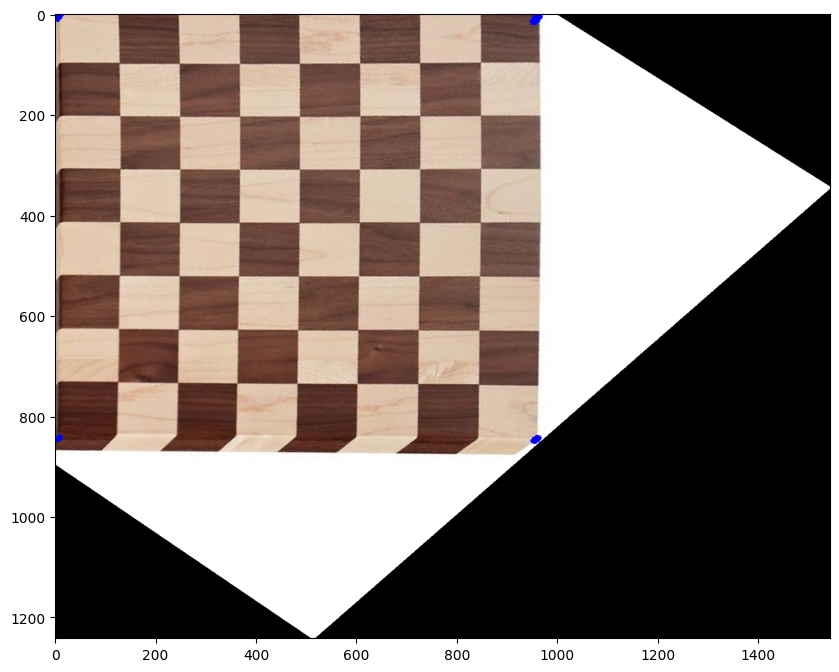

In [5]:
h2_2_h1=transform_h_2_h(image_2,image_1,cv_points_2, cv_points_1,show_H=True)
plt.figure(figsize=(10,10))
plt.imshow(h2_2_h1)

Q4 Appendix. Demonstrate the integral image from h_2 to h_1 is shown below. Coordinates from both h_1 and h_2 should be reselected to fit the image

saved points [(243, 241), (963, 246), (965, 962), (246, 963)] [(207, 8), (560, 372), (293, 841), (11, 468)]
[[ 1.93891389e+00  7.64283277e-01 -1.37669441e+02]
 [-9.61660802e-01  1.06240290e+00  4.58143987e+02]
 [ 5.34841676e-04 -5.30200851e-05  1.00000000e+00]]


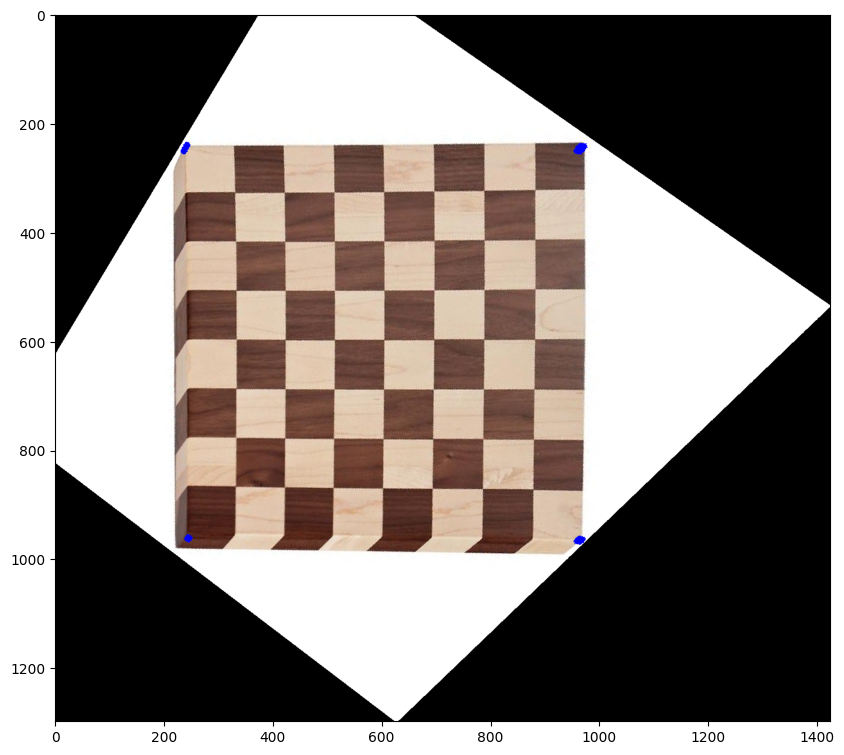

In [6]:
points_1=[]
points_2=[]
def coordinates_select(event, x, y, flags, param):
    """
    GUI function it will first show h1.jpg to choose 4 coordinates,
    then show h2.jpg and choose 4 corresponding coordinates pairs with h1.jpg
    each will be saved in points_1 and points_2 respectively 

    """
    global click_on_image
    if event == cv2.EVENT_LBUTTONDOWN:
        if click_on_image==1:
           points_1.append((x, y))
           cv2.circle(image_1, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on h1.jpg', image_1)
        elif click_on_image==2:
           points_2.append((x, y))
           cv2.circle(image_2, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on h2.jpg corresponding to points in h1.jpg', image_2)
        elif click_on_image==3:
           points_b.append((x, y))
           cv2.circle(image_b, (x, y), 5, (0, 0, 255), -1)
           cv2.imshow('Find four points on bus.jpg', image_b)

click_on_image=1
cv2.imshow('Find four points on h1.jpg', image_1)
cv2.setMouseCallback('Find four points on h1.jpg', coordinates_select)
while len(points_1) < 4:
    cv2.waitKey(10)
cv2.destroyWindow('Find four points on h1.jpg')

click_on_image=2
cv2.imshow('Find four points on h2.jpg corresponding to points in h1.jpg', image_2)
cv2.setMouseCallback('Find four points on h2.jpg corresponding to points in h1.jpg', coordinates_select)
while len(points_2) < 4:
    cv2.waitKey(10)
cv2.destroyWindow('Find four points on h2.jpg corresponding to points in h1.jpg')


def cv2_coordinates(points_1, points_2):
    img_p1=[]
    img_p2=[]
    for (x,y),(u,v) in zip(points_1, points_2):
        img_p1.append((y,x))
        img_p2.append((v,u))
    return img_p1, img_p2
cv_points_1, cv_points_2= cv2_coordinates(points_1, points_2)
print("saved points",cv_points_1, cv_points_2)

h2_2_h1_integral=transform_h_2_h(image_2,image_1,cv_points_2, cv_points_1,show_H=True)
plt.figure(figsize=(10,10))
plt.imshow(h2_2_h1_integral)

Q5. simpsons simpsons and bus. Ask the user to select the points for transforming the simpsons image to the advertisement area of the bus.

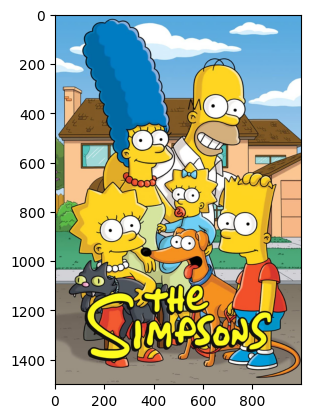

In [7]:

plt.imshow(image_s)
points_b=[]
a,b,_= image_s.shape
c,d,_= image_b.shape
points_s=[(0,0), (0, a), (b, a), (b, 0)] 
image_b = cv2.imread('bus.jpg')
image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB)
click_on_image=3
cv2.imshow('Find four points on bus.jpg', image_b)
cv2.setMouseCallback('Find four points on bus.jpg', coordinates_select)
while len(points_b) < 4:
    cv2.waitKey(10)
cv2.destroyWindow('Find four points on bus.jpg')

cv_points_s, cv_points_b= cv2_coordinates(points_s, points_b)


[[2.10912835e-01 9.76225837e-02 2.06000000e+02]
 [1.34805699e-02 4.65192400e-01 5.85000000e+02]
 [6.92360030e-06 3.14383479e-04 1.00000000e+00]]


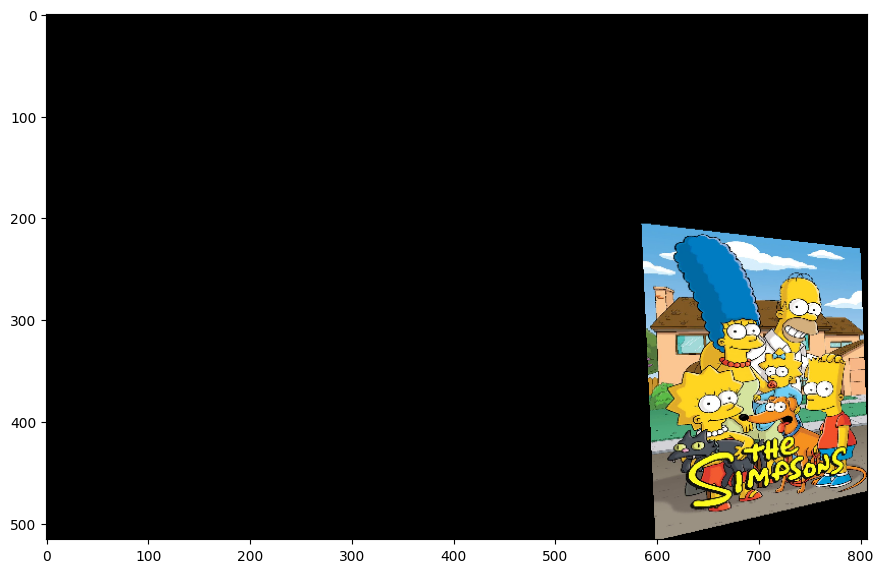

In [8]:
h_s_2_h_b=transform_h_2_h(image_s,image_b,cv_points_s, cv_points_b,show_H=True)
plt.figure(figsize=(15,15))
plt.subplot(212)
plt.imshow(h_s_2_h_b)



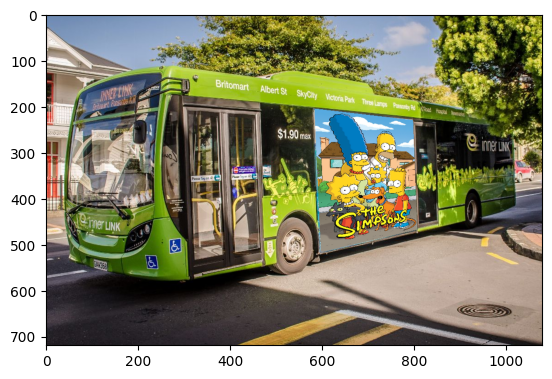

In [9]:
image_b = cv2.imread('bus.jpg')
image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB)
i=min(image_b.shape[0],h_s_2_h_b.shape[0])
j=min(image_b.shape[1],h_s_2_h_b.shape[1])
for row in range(i):
    for col in range (j):
        if  not np.all(h_s_2_h_b[row][col] == [0, 0, 0]):
            image_b[row][col]=h_s_2_h_b[row][col]
        
plt.imshow(image_b)

In [75]:
cv2.destroyAllWindows()